In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from pgmpy.models import BayesianModel   
from pgmpy.inference import VariableElimination
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import zscore
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data_df2=pd.read_csv('heart.csv')  #https://www.kaggle.com/ronitf/heart-disease-uci

In [3]:
data_df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(data_df2)

303

In [5]:
data_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data_df2['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
data_df2['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [8]:
data_df2['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [9]:
data_df2['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [10]:
data_df2['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

**Check if there any outliers**

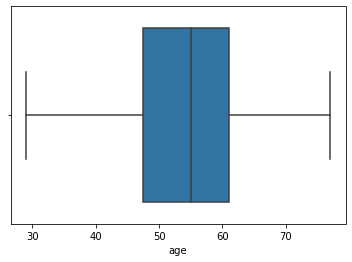

In [11]:
sns.boxplot(data_df2['age'])

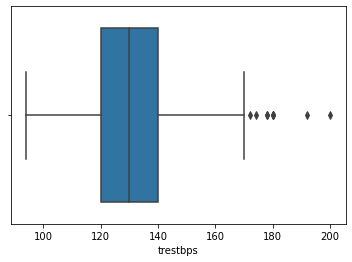

In [12]:
sns.boxplot(data_df2['trestbps'])

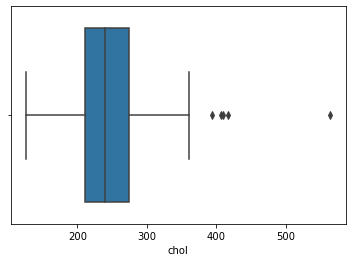

In [13]:
sns.boxplot(data_df2['chol'])

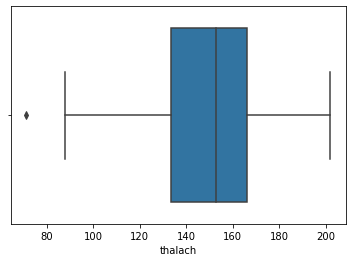

In [14]:
sns.boxplot(data_df2['thalach'])

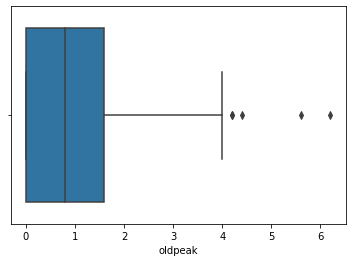

In [15]:
sns.boxplot(data_df2['oldpeak'])

**dealing with outlier**

In [16]:
# #dealing with outlier
# median_trestbps = float(data_df2['trestbps'].median())
# data_df2["trestbps"] = data_df2["trestbps"].mask(data_df2["trestbps"] >170, median_trestbps)

# median_chol = float(data_df2['chol'].median())
# data_df2["chol"] = data_df2["chol"].mask(data_df2["chol"] >370, median_chol)

# median_oldpeak = float(data_df2['oldpeak'].median())
# data_df2["oldpeak"] = data_df2["oldpeak"].mask(data_df2["oldpeak"] >4, median_oldpeak)

# median_thalach = float(data_df2['thalach'].median())
# data_df2["thalach"] = data_df2["thalach"].mask(data_df2["thalach"] <90, median_thalach)



**use z_score to remve outliers**

In [17]:
# use zscor to remve outliers 
z_scores = zscore(data_df2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_df2 = data_df2[filtered_entries]

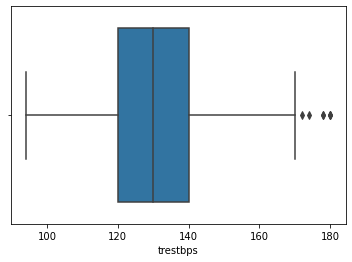

In [18]:
#plot oldpeak feature after replace outliers
sns.boxplot(data_df2['trestbps'])

In [19]:
data_df3=data_df2.copy(deep=True)   #just make a copy of dataframe without changing original


**change the values into the categorical variables**

In [20]:

data_df3['sex'][data_df3['sex'] == 0] = 'female'
data_df3['sex'][data_df3['sex'] == 1] = 'male'


data_df3['cp'][data_df3['cp'] == 0] = 'typical angina'
data_df3['cp'][data_df3['cp'] == 1] = 'atypical angina'
data_df3['cp'][data_df3['cp'] == 2] = 'non-anginal pain'
data_df3['cp'][data_df3['cp'] == 3] = 'asymptomatic'

data_df3['fbs'][data_df3['fbs'] == 0] = 'lower than 120mg/ml'
data_df3['fbs'][data_df3['fbs'] == 1] = 'greater than 120mg/ml'

data_df3['restecg'][data_df3['restecg'] == 0] = 'normal'
data_df3['restecg'][data_df3['restecg'] == 1] = 'ST-T wave abnormality'
data_df3['restecg'][data_df3['restecg'] == 2] = 'left ventricular hypertrophy'

data_df3['exang'][data_df3['exang'] == 0] = 'no'
data_df3['exang'][data_df3['exang'] == 1] = 'yes'


data_df3['slope'][data_df3['slope'] == 1] = 'upsloping'
data_df3['slope'][data_df3['slope'] == 2] = 'flat'
data_df3['slope'][data_df3['slope'] == 3] = 'downsloping'


data_df3['thal'][data_df3['thal'] == 1] = 'normal'
data_df3['thal'][data_df3['thal'] == 2] = 'fixed defect'
data_df3['thal'][data_df3['thal'] == 3] = 'reversable defect'

<ipython-input-20-6aaca93c0158>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df3['sex'][data_df3['sex'] == 0] = 'female'
<ipython-input-20-6aaca93c0158>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df3['cp'][data_df3['cp'] == 0] = 'typical angina'
<ipython-input-20-6aaca93c0158>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df3['fbs'][data_df3['fbs'] == 0] = 'lower than 120mg/ml'
<ipython-input-20-6aaca93c015

In [21]:
data_df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


**Data visualization**

In [22]:
def bar_chart(feature):
    presence_0=data_df3[data_df3['target']==0][feature].value_counts()
    presence_1=data_df3[data_df3['target']==1][feature].value_counts()

    df_target=pd.DataFrame([presence_0,presence_1])
    df_target.index=['No_presence','presence']
    df_target.plot(kind='bar',stacked=True,figsize=(10,5))

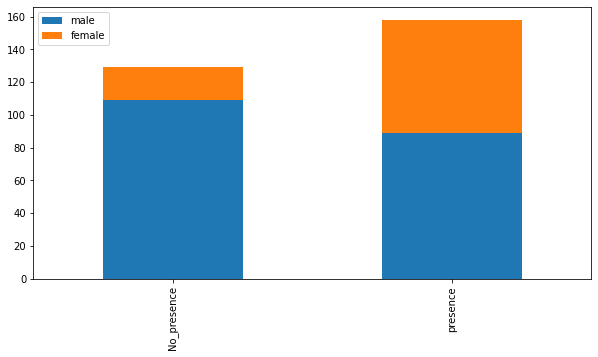

In [23]:
bar_chart('sex')

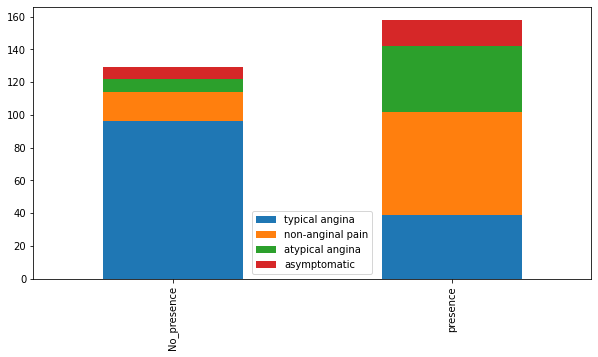

In [24]:
bar_chart('cp')

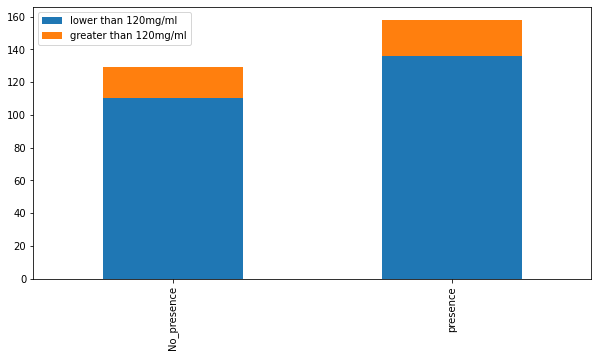

In [25]:
bar_chart('fbs')

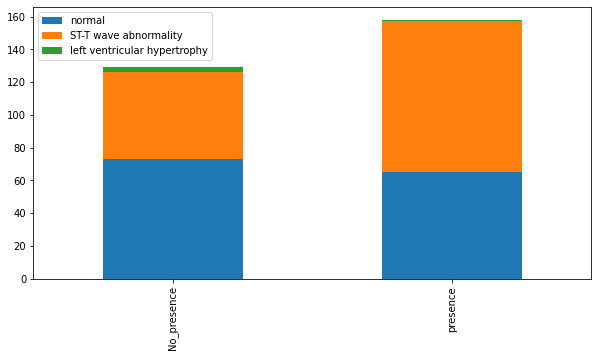

In [26]:
bar_chart('restecg')

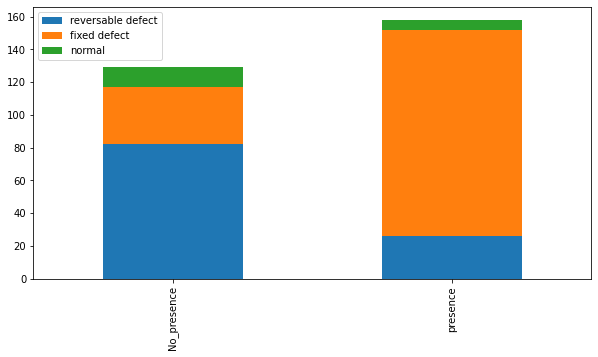

In [27]:
bar_chart('thal')

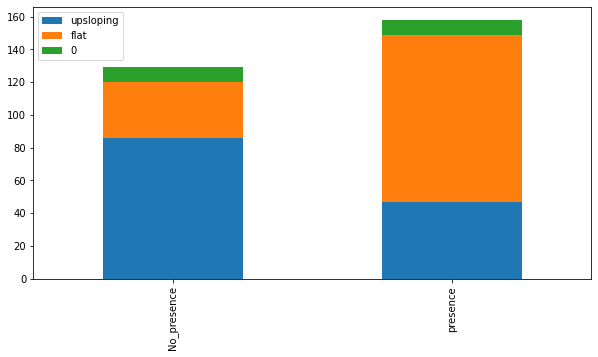

In [28]:
bar_chart('slope')

In [29]:
data_df3 = pd.get_dummies(data_df3, drop_first=True)

In [30]:
data_df3.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,0,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,1,0,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,1,0,0,0


**split our data into train and test**

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_df3.drop('target', 1), data_df3['target'], test_size = .2, random_state=10) #split the dat

**Data Scaling**

In [32]:
#Data Scaling
sd_X=StandardScaler()  #Standardization
X_train_sc1 = sd_X.fit_transform(X_train1)
X_test_sc1 = sd_X.transform(X_test1)


# sc_X = MinMaxScaler()
# X_train_sc1 = sc_X.fit_transform(X_train1)
# X_test_sc1 = sc_X.transform(X_test1)

**Try more algoritm and tuning**

In [33]:
logi_clf = LogisticRegression(solver='lbfgs', max_iter=500)
logi_parm = {"C": [0.1, 0.5, 1, 5, 10, 50],
            'random_state': [0,1,2,3,4,5]}

svm_clf = SVC(probability=True)
svm_parm = {'kernel': ['rbf', 'poly'], 
            'C': [1, 5, 50, 100, 500, 1000,1500,2000], 
            'degree': [3, 5, 7], 
       'gamma':[0.01,0.04,.1,0.2,.3,.4,.6],
           'random_state': [0,1,2,3,4,5]}

dt_clf = DecisionTreeClassifier()
dt_parm = {'criterion':['gini', 'entropy'],
          'random_state': [0,1,2,3,4,5]}

knn_clf = KNeighborsClassifier()
knn_parm = {'n_neighbors':[5, 10, 15, 20], 
            'weights':['uniform', 'distance'], 
            'p': [1,2]}

gnb_clf = GaussianNB()
gnb_parm = {'priors':['None']}

clfs = [logi_clf, svm_clf, dt_clf, knn_clf]
params = [logi_parm, svm_parm, dt_parm, knn_parm] 
clf_names = ['logistic', 'SVM', 'DT', 'KNN', 'GNB']

In [34]:
clfs_opt = []
clfs_best_scores = []
clfs_best_param = []
for clf_, param in zip(clfs, params):
    clf = RandomizedSearchCV(clf_, param, cv=5)
    clf.fit(X_train_sc1, y_train1)
    clfs_opt.append(clf.best_estimator_)
    clfs_best_scores.append(clf.best_score_)
    clfs_best_param.append(clf.best_params_)

**print best model score**

In [35]:
max(clfs_best_scores)

0.8514009661835749

In [36]:
arg = np.argmax(clfs_best_scores)
clfs_best_param[arg]
clf = clfs_opt[arg]

In [37]:
clf

LogisticRegression(C=0.1, max_iter=500, random_state=0)

In [38]:
pred = clf.predict(X_test_sc1)

In [39]:
y_test=pd.DataFrame(y_test1)
pred=pd.DataFrame(pred)
pred=np.array(pred)
y_test=np.array(y_test)
pred=np.concatenate(pred)
y_test=np.concatenate(y_test)

In [40]:
data1 = {'y_Actual':    y_test,
        'y_Predicted': pred}

In [41]:
df1 = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])

In [42]:
confusion_matrix = pd.crosstab(df1['y_Actual'], df1['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1
Actual           
0          22   9
1           0  27


**Try RandomForestClassifier**

In [56]:
#Try RandomForestClassifier
model2 = RandomForestClassifier(max_depth=5)
model2.fit(X_train_sc1, y_train1)

RandomForestClassifier(max_depth=5)

In [57]:
y_predict2 = model2.predict(X_test_sc1)


In [58]:
y_predict2=np.array(y_predict2)
y_test1=np.array(y_test1)

In [59]:
data3 = {'y_Actual':    y_test1,
        'y_Predicted': y_predict2}

In [60]:
df3 = pd.DataFrame(data3, columns=['y_Actual','y_Predicted'])

In [61]:
confusion_matrix = pd.crosstab(df3['y_Actual'], df3['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1
Actual           
0          22   9
1           0  27


In [62]:
accuracy_score(y_test1,y_predict2)

0.8448275862068966

**Try GradientBoostingClassifier**

In [67]:
p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train_sc1, y_train1)


C:\Users\mohamed.elhemdany\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [70]:
for i in ['mean_test_score', 'std_test_score', 'param_n_estimators']:
        print(i," : ",tuning.cv_results_[i])


mean_test_score  :  [0.847343   0.8342029  0.81227053 0.81236715 0.81236715 0.82985507
 0.82125604 0.81256039 0.82560386 0.82125604 0.80801932 0.81246377
 0.81236715 0.81671498 0.8210628  0.81671498 0.82995169 0.82995169
 0.8210628  0.81671498 0.8210628  0.82541063 0.8210628  0.8210628
 0.84309179 0.85198068 0.84309179 0.82995169 0.82995169 0.82995169
 0.82995169 0.82560386 0.82115942 0.85188406 0.86057971 0.84753623
 0.84753623 0.83874396 0.84309179 0.83429952 0.57207729 0.73797101
 0.82995169 0.83864734 0.83874396 0.84753623 0.84753623 0.85188406]
std_test_score  :  [0.06115263 0.05031804 0.03766827 0.03183366 0.03183366 0.0392922
 0.05508094 0.06180177 0.05941047 0.06000848 0.05168188 0.05544193
 0.05210283 0.04432203 0.03142192 0.03738094 0.04368176 0.06314658
 0.04606031 0.03982927 0.05364416 0.04529701 0.0439604  0.03695144
 0.04979868 0.07800375 0.06011758 0.05684494 0.05684494 0.05684494
 0.05684494 0.05266365 0.04583561 0.06894896 0.06206148 0.05951142
 0.05951142 0.05551093 0

In [71]:
GB=GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10, 
          learning_rate= 0.01, n_estimators= 1750)


In [72]:
GB.fit(X_train_sc1, y_train1)


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='sqrt',
                           n_estimators=1750, random_state=10, subsample=1)

In [79]:
y_predict_GB = GB.predict(X_test_sc1)


In [80]:
y_predict_GB=np.array(y_predict_GB)
y_test1=np.array(y_test1)

In [81]:
data4 = {'y_Actual':    y_test1,
        'y_Predicted': y_predict_GB}

In [82]:
df4 = pd.DataFrame(data4, columns=['y_Actual','y_Predicted'])

In [83]:
confusion_matrix = pd.crosstab(df3['y_Actual'], df4['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1
Actual           
0          23   8
1           0  27


In [84]:
accuracy_score(y_test1,y_predict_GB)

0.8620689655172413

**Apply Bayesian Network**

- a Bayesian network could represent the probabilistic relationships between diseases and symptoms. Given symptoms, the network can be used to compute the probabilities of the presence of various diseases

- BN is defined as a Directed Acyclic Graph (DAG) and a set of Conditional Probability Tables (CPTs). In practice, a problem domain is initially modeled as a DAG.

In [85]:
data_df2.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [86]:
model3=BayesianModel([('age','trestbps'),('age','sex'),('trestbps','slope'),('slope','target')])

In [87]:
model3.fit(data_df2)

In [88]:
inference=VariableElimination(model3)

In [89]:
query=inference.query(variables=['target'],evidence={'age':68,'sex':1,'trestbps':144,'slope':1})

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [90]:
print(query) #depend on how we construct the network

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6466 |
+-----------+---------------+
| target(1) |        0.3534 |
+-----------+---------------+
